In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [3]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

importing dataset

In [4]:
dataset = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
combine = [dataset, test_data]
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data can be categorized into two category: 
1)Numerical - Pclass, Age, SibSp, Parch, Fare, Survived
2)Object - Name, Sex, Cabin, Embarked, Ticket

Let's do some Visualization of Training set data, i.e dataset

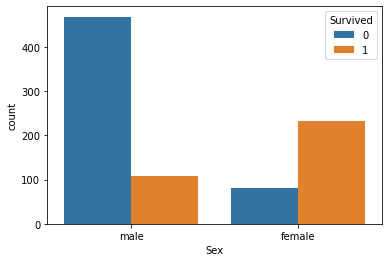

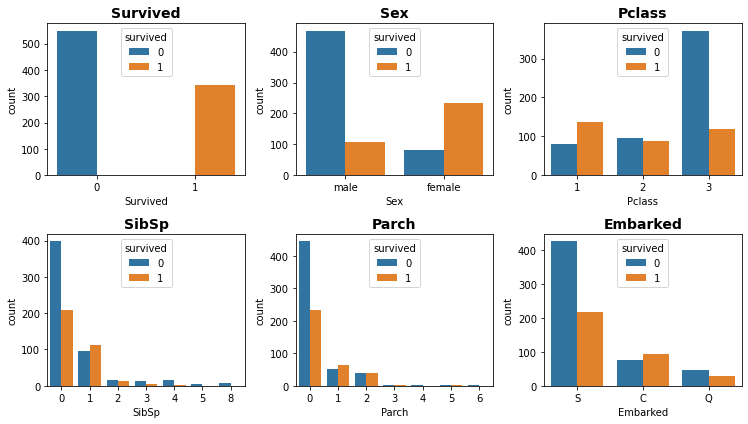

In [5]:
ax = sns.countplot(x='Sex', hue='Survived', data=dataset)
#plt.show()

col = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
no_of_rows = 2
no_of_col = 3
fig, axs = plt.subplots(no_of_rows, no_of_col, figsize=(no_of_col * 3.5, no_of_rows * 3))

for r in range(0, no_of_rows):
    for c in range(0, no_of_col):
        i = r * no_of_col + c
        ax = axs[r][c]
        sns.countplot(dataset[col[i]], hue=dataset["Survived"], ax=ax)
        ax.set_title(col[i], fontsize=14, fontweight='bold')
        ax.legend(title="survived", loc='upper center')

plt.tight_layout()
#use plt.show() if you are using an IDE like Pycharm

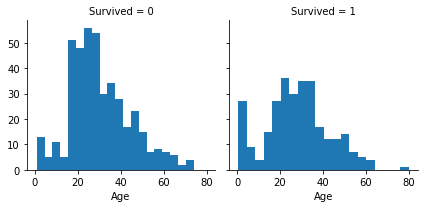

In [6]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

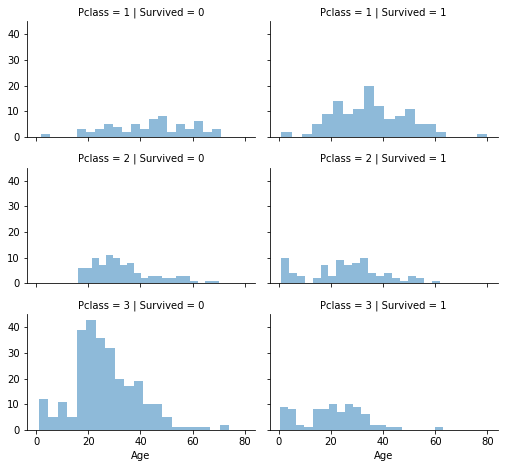

In [7]:
# grid = sns.FacetGrid(dataset, col='Pclass', hue='Survived')
grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [8]:
for dat in combine:
    dat['Title'] = dat.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dat in combine:
    dat['Title'] = dat['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dat['Title'] = dat['Title'].replace('Mlle', 'Miss')
    dat['Title'] = dat['Title'].replace('Ms', 'Miss')
    dat['Title'] = dat['Title'].replace('Mme', 'Mrs')

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [9]:
for dat in combine:
    dat['Title'] = dat['Title'].map(title_mapping)
    dat['Title'] = dat['Title'].fillna(0)

dataset = dataset.drop(['Name', 'PassengerId', 'Cabin', 'Embarked', 'Ticket','Fare'], axis=1)

test_data = test_data.drop(['Name', 'PassengerId', 'Cabin', 'Embarked', 'Ticket', 'Fare'], axis=1)
combine = [dataset, test_data]
dataset.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,0,3,male,22.0,1,0,1
1,1,1,female,38.0,1,0,3
2,1,3,female,26.0,0,0,2
3,1,1,female,35.0,1,0,3
4,0,3,male,35.0,0,0,1


In [10]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,male,34.5,0,0,1
1,3,female,47.0,1,0,3
2,2,male,62.0,0,0,1
3,3,male,27.0,0,0,1
4,3,female,22.0,1,1,3


In [11]:
X = dataset.iloc[:, 1:].values
X_test = test_data.iloc[:, :].values
y = dataset.iloc[:, 0].values

In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 2:3])
X[:, 2:3] = imputer.transform(X[:, 2:3])
imputer.fit(X_test[:, 2:3])
X_test[:, 2:3] = imputer.transform(X_test[:, 2:3])

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# Encoding the test set
c_t = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_test = np.array(c_t.fit_transform(X_test))
# print(X)

In [14]:
# Training the SVM model on the Training set
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X, y)

SVC(kernel='linear', random_state=0)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred.reshape(len(y_pred), 1))

[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
